
<img src="http://www.digitalconversations.com.au/wp-content/uploads/2017/08/boost.jpg" height="300">
<br></br> 
<br></br> 
<br></br> 

<h1><center>Boosting Models</center></h1>
<div class="pull-right"><h3>Ybigta Design Team 11기 김도영</h3></div>
<br></br> 
<br></br> 

---


<h2>Intro</h2>

Boosting Model에 대해 개인적으로 공부한 내용을 정리한 글입니다.<br></br> 
다양한 글을 편집하여 구성했으며, 출처는 글 마지막에 정리해두겠습니다.<br></br> 

요즘 가장 핫한 XGBOOST를 이해하기 위해서는 먼저 Boosting이 무엇인지 알아야 합니다.<br></br> 
<br></br> 
<br></br> 

<h2>모형 결합의 기초</h2><br></br>
<br></br> 
Boosting을 알아보기에 앞서, 이의 상위개념인 모형 결합에 대해 잠시 짚고 넘어가겠습니다.<br></br>
어디까지나 Boosting의 이해를 돕기 위한 내용이므로, 자세한 부분이 이해되지 않는다면 그냥 넘어가셔도 좋습니다.<br></br>

모형 결합(model combining) 방법은 앙상블 방법론(ensemble methods)이라고도 합니다.<br></br> 
이는 복수의 예측 모형을 결합하여 더 나은 예측 결과를 얻기 위한 시도로 볼 수 있습니다.<br></br> 
<br></br> 
모형 결합 방법을 사용하면 일반적으로 계산량은 증가하지만,<br></br> 
여러 모형의 (가중)평균치를 예측치로 사용하므로 variance가 감소하여 overfitting을 방지할 수 있습니다.<br></br> 
(variance - bias tradeoff에 대해 잘 모르거나 더 알고싶다면 <a href="http://sohnnn.tistory.com/entry/Bias-and-Variance-tradeoff-1">여기</a>를 참고하세요)<br></br> 
(bias는 일정 수준으로 유지하면서 variance는 줄이는 bagging에 대한 자세한 설명은 <a href="https://www.quora.com/What-does-Bagging-reduces-the-variance-while-retaining-the-bias-mean">여기</a>에 있어요!)<br></br> 
<br></br> 
<br></br> 

모형 결합 방법은 크게 취합(aggregation) 방법론과 부스팅(boosting) 방법론으로 나뉩니다.<br></br> 
<br></br> 

취합 방법론은 사용할 모형의 집합이 '이미' 결정되어 있지만, 부스팅 방법론은 사용할 모형을 '점진적으로' 늘려나갑니다.<br></br>
(취합 방법론은 모델의 병렬결합, 부스팅 방법론은 모델의 연속적결합으로 이해해주세요.)<br></br>
<a href="https://www.youtube.com/watch?v=2Mg8QD0F1dQ">3분만에 Bagging 이해하기</a><br></br>
<a href="https://www.youtube.com/watch?v=GM3CDQfQ4sw">3분만에 Boosting 이해하기</a><br></br>
<br></br>
<br></br>

<img src="https://quantdare.com/wp-content/uploads/2016/04/bb3-800x307.png">

<br></br>
<br></br>
* 취합 방법론이 적용된 대표 알고리즘

> - 다수결 (Majority Voting)
> - 배깅 (Bagging)
> - 랜덤 포레스트 (Random Forests)
 

* 부스팅 방법론이 적용된 대표 알고리즘

> - [애-다]부스트 (AdaBoost)
> - 그레디언트 부스트 (Gradient Boost)


<br></br>
<br></br>

<h2>Boosting이란?</h2>
<br></br>
<br></br>

Boosting이란 무작위로 선택하는 것보다 약간 가능성이 높은 규칙(이것을 전문 용어로는 weak learner/classifier라고 합니다.)들을 결합시켜 보다 정확한 예측 모델을 만들어 내는 것을 말합니다. Boosting이란 이름이 붙은 이유도 약한 것들을 여러 개 결합시켜 강한 모델을 만들어낸다는 의미에서 붙은 것이지요.

<br></br>
Boosting의 역사는 한참을 거슬러 올라가지만, 1989년 Schapire가 제대로 된 모델을 발표했으며, 그 이후 Freund가 좀 더 효율적인 Boosting 알고리즘을 발표하게 됩니다. Boosting은 주로 classification에 관련된 문제를 해결하기 위해 고안이 되었지만, 통계 등에서 사용하는 regression에도 사용할 수 있는 훌륭한 알고리즘이며, 일부 사람들은 90년대에 개발된 최고의 머신러닝 알고리즘 중 하나라고 평하기도 합니다.

<br></br>

이해를 돕기 위해 가장 많이 쓰이는 예시를 하나 가져왔습니다.

가령 내가 받은 메일이 스팸메일인지 아닌지의 여부를 가릴 수 있는 방법을 개발한다고 가정합시다.<br></br> 
스팸 여부를 판정할 수 있는 기준은 많으며, 예를 들어 아래과 같은 것들이 있습니다. (간단한 규칙들에 대하여 Yes/No로만 판정!)<br></br>


- 링크만 있는 경우 => 스팸
- 메일 내용에 “당신의 보험료가 xxx 입니다”라는 내용이 들어 있는 경우 => 스팸
- 도메인 주소가 확실한 경우 => 스팸 아님
- 보낸 사람이 확실한 경우 => 스팸 아님

<img src="https://1335865630.rsc.cdn77.org/images/Spam-filter.jpg">

스팸 여부를 판단할 수 있는 기준들은 위에서 열거한 일부 경우 외에도 아주 많습니다. <br></br>
그런데 위에서 열거한 기준들은 모든 메일에 똑같이 적용할 수 있을 정도로 확실하거나 강력한 규칙은 아닙니다. <br></br>
바로 이런 것들을 weak learner(rule, classifier)라고 합니다.<br></br>

<br></br>

그럼 이러한 weak learner를 strong learner로 바꿀 수 있는 방법은 무엇일까요?<br></br> 
아무래도 여러 weak learner들을 **하나로 합친다면**, 가능하지 않을까요?<br></br> 

여러 weak learner들을 **하나로 합치는** 방법에는 

- 평균/ 가중 평균(weighted average)를 사용하는 방법
- 가장 많은 의견(vote)을 얻은 것을 선정하는 방법

과 같은 방법을 생각해 볼 수 있겠네요.

앞서 살펴본 스팸 메일 여부를 가리는 규칙에 위 두가지 방법을 적용하면, 좀 더 강력한 스팸 필터가 만들어질 것이며, 
규칙이 더 늘어나면 늘어날수록 더 좋은 결과를 기대할 수 있게 될 것입니다.
<br></br>
<br></br>


<h2>Boosting 학습 방법</h2>
<br></br>
<br></br>

우리는 이제 weak learner(a.k.a. base learner)들이 모여 하나의 strong rule을 만든다는 사실을 알게 되었습니다.<br></br>
그렇다면 먼저 그 'weak learner'들이 어떻게 결정되는지 살펴보아야겠죠.<br></br>

Boosting의 가장 기본적인 아이디어는 "이전 모델이 많이 틀리는 부분에 집중한다!" 입니다.<br></br>

일단 가장 먼저 학습하는 첫번째 weak learner는 아무런 사전정보가 없으므로, 가중치가 전혀 부여되지 않은 데이터셋을 바탕으로 학습합니다.<br></br>
그 결과로 예측한 값에는 어느 정도 오차가 있을 수밖에 없겠죠.<br></br>

그리고 여기서부터 중요한 내용이 등장합니다.<br></br>
그 다음 모델은 그 오차가 발생한 데이터, 즉 맞추지 못한 데이터에 가중치가 부여된 데이터셋에서 resampling된 데이터로 학습을 하게됩니다.<br></br>
가중치가 부여된 데이터는 다른 데이터에 비해 추출될 확률이 더 높습니다.<br></br>
(기본적으로 기존 데이터를 training set과 test set으로 나누고, training set 안에서 비복원 추출, 가중치가 부여되면 여러번 뽑힐 확률 증가)<br></br>
이렇게하면 두번째 모델은 아무래도 첫번째 모델이 틀렸던 부분에 더 특화된 모델이 되지 않을까요?<br></br>

이 과정에서 이전보다 더 높은 예측률이 관찰되면 이 두번째 모델은 두번째 weak learner로 선정되고, <br></br>
첫번째 모델과 두번째 모델 모두 잘 맞추지 못한 데이터에는 다시 가중치가 부여되어 세번째 모델의 데이터셋에 영향을 주게 됩니다.<br></br>

<img src="https://littleml.files.wordpress.com/2017/03/boosted-trees-process.png"><br></br>

이와 같은 과정을 거치면서 K개의 weak learner가 생성되고,<br></br>
하나의 strong rule은 각 weak learner들의 가중평균으로 구성됩니다. <br></br>
그리고 각 weak learner들에 부여되는 가중치는 해당 모델의 예측력을 기준으로 합니다. <br></br>
예측력이 높다면 해당 모델은 좀 더 높은 가중치를 부여받겠죠. <br></br>
<br></br>
<br></br>
<br></br>
Bagging에 대해 어느 정도 이해하셨다면, Boosting은 Bagging에서 bias까지 컨트롤하기위해 좀 더 발전한 형태라는 점을 눈치채셨을겁니다.<br></br>
아무래도 이전 모델이 잘 맞추지 못하는 영역에 집중하면 당연히 bias는 줄어들겠죠.<br></br>
이런 점 때문에 Boosting이 마치 variance와 bias를 모두 컨트롤하는 것처럼 느껴지기도 합니다.<br></br>

물론 Boosting을 통해 variance와 bias를 둘 다 낮출 수 있는 것은 사실입니다. (https://www.quora.com/What-effect-does-boosting-have-on-bias-and-variance)<br></br>
위에서도 언급했지만 기본적으로 앙상블 기법은 variance를 낮춰 좀 더 일반적인(generalized) 모델을 만들어줍니다.<br></br>
하지만 이전 모델들이 잘 맞추지 못하는 포인트에 지속적으로 집중하여 weak learner를 만들어내다보면,<br></br> 
결국 strong rule 자체는 training set에 과적합될 수밖에 없습니다.<br></br>
항상 overfitting의 위험성을 가지고 있는 것이죠. <br></br>

뒤에서 설명할 Adaptive boosting은 쉽게 overfitting되지 않지만, Gradient boosting의 경우 과적합의 위험을 항상 가지고 있으므로 좋은 성능을 내기 위해서는 파라미터 튜닝이 꼭 필요합니다. (https://www.quora.com/Why-is-the-boosting-algorithm-robust-to-overfitting)<br></br>
<br></br>
<br></br>
<br></br>
어쩌다보니 단점부터 소개하게 되었지만, Boosting 모델에는 사실 장점이 훨씬 더 많습니다.<br></br>
실제 Kaggle Competition에서 우승한 사람들 대부분은 GradientBoost를 개량한 XGBoost를 사용하였고, 이는 Boosting 모델이 그만큼 훌륭한 범용성을 지니고 있다는 증거일 것입니다.<br></br>
XGBoost를 개발한 Tianqi Chen 또한 이 모델이 Classification, regression, ranking 등 대부분의 문제에 적용될 수 있다고 말하고 있습니다.<br></br> 
그야말로 믿고 쓰는 XGBoost가 아닐 수 없습니다.<br></br>
<br></br>
<br></br>
<br></br>

<h2>Boosting Model 소개</h2>
<br></br>
<br></br>
<br></br>

| 알고리즘 | 특징 | 
| ---
| AdaBoost | 다수결을 통한 정답 분류 및 오답 가중치 부여 | 
| GradientBoost | Loss Function의 gradient를 통해 오답에 가중치 부여  | 
| XGBoost |  GradientBoost를 효율적으로 개선<br></br> 시스템 자원 효율적 활용 ( CPU, Mem)<br></br> 2014년 공개 | 
| Light GBM | Xgboost 대비 성능향상 및 자원소모 최소화<br></br> Xgboost가 처리하지 못하는 대용량 데이터 학습 가능<br></br> Approximates the split (근사치의 분할)을 통한 성능 향상<br></br> 2016년 공개  |

<br></br>
<br></br>
<br></br>
아래에서 다룰 알고리즘은 AdaBoost, GradientBoost, XGBoost로 총 세가지이지만, XGBoost의 원리 자체는 GradientBoost와 동일하므로 자세한 설명은 
AdaBoost와 GradientBoost에 치중할 예정입니다.
Light GBM은 가장 최근에 공개되었고, 그만큼 사용 가능한 툴도 적을 뿐더러 저 또한 사용해보지 못했으므로 다음 기회에 알아보도록 합시다.<br></br>
<br></br>
<br></br>
<br></br>










<script type="text/javascript"  src="http://cdn.mathjax.org/mathjax/latest/MathJax.js?config=TeX-AMS-MML_HTMLorMML"></script> 

<h2>Adaptive Boosting (AdaBoost)</h2>
<br></br>
<br></br>
<br></br>
AdaBoost는 앞서 살펴본 부스팅 알고리즘을 좀 더 발전시킨 개념이라고 볼 수 있습니다. <br></br>
기존 앙상블 알고리즘의 경우 각 개별 분류기의 “committee”에서 의사결정 가중치가 모두 동일하게 이뤄졌다면, <br></br>
AdaBoost는 개별 Classifier의 의사결정 가중치를 서로 달리하는 개념이 추가적으로 반영된 알고리즘이라고 할 수 있습니다.<br></br>
쉽게 말해 개별 weak learner에 가중치를 적용한다고 이해하시면 됩니다.<br></br>
<br></br>
<img src="http://postfiles10.naver.net/MjAxNzAxMTVfNTAg/MDAxNDg0NDgyNDQ4NTQ4.aBH0a8HLOkwPoHEph3WeCsmlhXlWXsY6qlmztEVFU50g.H7rwuKVxP_xp8meQt5uJOyoqp10p8ukRc9GuEffWMKog.PNG.gksshdk8003/%EA%B7%B8%EB%A6%BC1.png?type=w773">
<br></br>

알고리즘의 진행순서는 위와 같습니다.

1. 먼저 모든 데이터 값의 가중치를 동일하게 설정합니다.
2. 전체 M개의 weak learner를 가정했을 때, 아래의 과정을 순차적으로 실행합니다. 
 - (a) training data 각각에는 현재 \\(w_i \\)의 개별 가중치가 부여되어 있습니다. 여기에서 bootstrapping한 data set으로 classifier(weak learner)를 학습시킵니다.
 - (b) 위의 식과 같이 error를 계산합니다. I function은 indicator funtion으로 괄호 안의 값이 True이면 1을, 그렇지 않을 경우 0을 반환합니다. m번째 모델의 error값은 0과 1사이의 값을 가지겠네요
 - (c) 계산한 error값을 사용하여 m번째 모델의 가중치를 계산, 갱신합니다. 식을 잘 살펴보면 error값이 커질수록 가중치인 \\(\alpha \\) 는 작아지는 것을 확인할 수 있습니다.
 - (d) 개별 데이터의 가중치 \\(w_i \\)를 갱신합니다. exp funtion은 \\( e^x \\), 즉 e의 지수승을 나타내는 함수입니다. 지수가 되는 값은 m번째 모델의 가중치 \\(\alpha \\)에 indicator funtion값을 곱한 값입니다. 만약 m번째 모델이 해당 데이터를 잘 맞췄다면 \\( e^0 \\), 즉 1이 되어 가중치에는 변화가 없습니다. 하지만 틀렸다면 \\( e^\alpha \\) > 1만큼의 가중치를 받게되겠죠.<br></br>
 이런 식으로 매 라운드마다 지속적으로 개별 모델의 가중치 \\(\alpha \\)와 개별 데이터의 가중치 \\(w_i \\)가 갱신되는 것을 확인할 수 있습니다.
3. 최종 아웃풋인 G(x), 즉 \\(y_i \\)의 예측치는 가중치가 부여된 개별 모델들의 예측값의 summation을 통해 산출됩니다. sign function은 괄호 안의 값의 부호를 판별하는 함수로, -1,0,1의 value를 갖습니다. 대부분의 값은 -1 또는 1로 분류될테니 Binary classification으로 이해하면 되겠군요.

<br></br>
<br></br>
<br></br>
좀 더 쉬운 이해를 위해 수식이 아닌 그림을 참고해보도록 하겠습니다.<br></br>
사실 위에서 설명한 Boosting과 큰 차이점이 없습니다.<br></br>

<img src="https://www.packtpub.com/graphics/9781788295758/graphics/image_04_046-1.png" width="">

첫번째 이터레이션에서 +와 -를 분류한 결과, -로 예측한 부분에 3개의 +가 섞여있습니다.(error)<br></br> 
따라서 -로 잘못 분류된 +들은 가중치를 받고,(두번째 이터레이션에서 크기가 커졌죠?) 그에 따라 두번째 모델은 +와 -를 분류합니다.<br></br> 
이러한 과정이 반복되고, 가중치가 부여된 모델들의 앙상블로 좋은 분류기를 만들어내는 과정을 확인할 수 있습니다.<br></br> 
<br></br>
<br></br>
<br></br>



<h2>AdaBoost practice</h2>
<br></br>
<br></br>
<br></br>

그럼 실제 데이터에 Adaboost를 한번 적용해볼텐데요, 그에 앞서 데이터 전처리 문제가 남아있습니다.<br></br>
AdaBoost를 데이터에 fitting시키기 전에 주의해야할 사항에는 어떤 것들이 있을까요?<br></br>

- 사실 tree 기반 모델은 전처리할 일이 별로 없습니다. 스케일링? 정규화? 다중공선성? 고려하지 않아도 좋습니다. 여기서 Adaboost를 tree 기반 모델이라고 하는 이유는 weak learner로 보통 CART(Classification and Regression Trees, Breiman et al.(1984))가 쓰이기 때문입니다.
- 결측치 또한 신경쓰지 않아도 됩니다. Adaboost에서 결측치는 무시됩니다.
- 중요한 것은 Outliers, 즉 특이값입니다. 위의 수식을 주의깊게 보셨다면, 개별 데이터의 가중치를 결정할때 exponential loss function이 사용된 것을 확인할 수 있을 것입니다. 그럼, 생각해봅시다. 1과 10의 차이는 고작 9이지만, e의 1승과 e의 9승의 차이는 어떨까요? classification의 문제야 별 상관이 없다 치더라도, regression의 경우 가중치를 계산할 때 엄청난 차이가 발생할 것입니다. 그리고 그 엄청난 차이는 보통 Outliers에서 발생합니다. regression 문제에 Adaboost를 사용하려 한다면 꼭 특이값을 처리한 후 fitting시킵시다. 

결과적으로 우린 일단은 특이값에만 신경써서 전처리하면 되겠군요.<br></br>
<br></br>
한가지 더, Feature Selection 과정에서 더미화한 Categorical feature들은 굳이 하나 빼지 말고 모두 적용해야합니다.<br></br>
회귀모델에서야 다중공선성 제거를 위해 한다고하지만, tree 기반 모델에서 value를 하나 지우면 이는 정보의 손실입니다. <br></br>
<br></br>
이제 데이터에 Adaboost를 한번 적용해봅시다.<br></br>
마침 사이킷런에 좋은 예제가 있어 가져와보았습니다.<br></br>
<br></br>
<br></br>
<br></br>


Automatically created module for IPython interactive environment


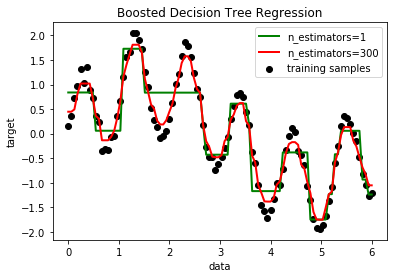

In [3]:
print(__doc__)

# Author: Noel Dawe <noel.dawe@gmail.com>
#
# License: BSD 3 clause

# importing necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor

# Create the dataset
rng = np.random.RandomState(1)
X = np.linspace(0, 6, 100)[:, np.newaxis]
y = np.sin(X).ravel() + np.sin(6 * X).ravel() + rng.normal(0, 0.1, X.shape[0])

# Fit regression model
regr_1 = DecisionTreeRegressor(max_depth=4)

regr_2 = AdaBoostRegressor(DecisionTreeRegressor(max_depth=4),
                          n_estimators=300, random_state=rng)

regr_1.fit(X, y)
regr_2.fit(X, y)

# Predict
y_1 = regr_1.predict(X)
y_2 = regr_2.predict(X)

# Plot the results
plt.figure()
plt.scatter(X, y, c="k", label="training samples")
plt.plot(X, y_1, c="g", label="n_estimators=1", linewidth=2)
plt.plot(X, y_2, c="r", label="n_estimators=300", linewidth=2)
plt.xlabel("data")
plt.ylabel("target")
plt.title("Boosted Decision Tree Regression")
plt.legend()
plt.show()

<br></br>
<br></br>
<br></br>
무작위로 생성된 데이터에 1개의 weak learner와 300개의 weak learner를 결합한 AdaboostRegressor를 동시에 학습시키고 그 결과를 비교한 것입니다.<br></br> tree 갯수가 300개 정도인데도 굉장히 잘 예측하는 것을 확인할 수 있는데요.


여기에서 AdaBoost의 또다른 장점 하나를 더 확인할 수 있습니다.
바로 tunning할 parameter가 아주 적다는 점이죠.

tab키를 눌러 parameter를 확인해보면 놀랍게도 고작 5개 뿐입니다. 

AdaBoostRegressor(base_estimator=None, n_estimators=50, learning_rate=1.0, loss='linear', random_state=None)

- base_estimator는 지정하지 않을 경우 디폴트 값으로 의사결정나무를 사용합니다
- n_estimators는 사용할 weak learner의 갯수입니다. 보통 많은 learner를 사용할수록 모델의 퍼포먼스도 향상됩니다.
- learning_rate는 말 그대로 학습 속도입니다. n_estimators와는 trade-off 관계에 있습니다. learning_rate가 작아서 조금씩 학습할수록 n_estimators는 더 많이 필요하겠죠. 대신 이럴 경우 더 정교한 학습이 가능해져 모델의 퍼포먼스가 향상됩니다. 보통 learning_rate는 작으면 작을수록 좋다고 하네요. 0.1 정도에서 시작하여 0.01 정도의 수준에서 최종 튜닝을 하라고 합니다. <a href="https://stats.stackexchange.com/questions/303998/tuning-adaboost">여기서요...</a>
- loss는 loss funtion에 관한 parameter입니다. linear로 설정되었으니 exp로 설정했을때 우리가 우려하는 특이값의 영향에서 자유로울 수 있겠네요!
- random_state는 resampling할때 사용하는 seed에 관련된 parameter인듯 합니다. 중요해보이진 않네요.
<br></br>
<br></br>
적정한 parameter의 값은 grid search via cross validation를 적용하면 찾을 수 있습니다.<br></br>
생성된 데이터를 가지고 grid search까지 해보지는 않겠습니다. <br></br>
잘 아시겠지만 적정 parameter 값을 찾는 일은 단순 노가다에 가깝기 때문이죠.<br></br>
사이킷런 라이브러리를 이용하면 그래도 쉽게 구현할 수 있으니 참고하시기 바랍니다. (http://cyan91.tistory.com/18)<br></br>
해당 예제와 AdaboostRegressor에 대한 더 자세한 설명은 사이킷런 페이지를 참고하세요. 
(http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostRegressor.html)
<br></br>
<br></br>
<br></br>

<script type="text/javascript"  src="http://cdn.mathjax.org/mathjax/latest/MathJax.js?config=TeX-AMS-MML_HTMLorMML"></script> 


<h2>Gradient boosting (GradientBoost)</h2>
<br></br>
<br></br>
<br></br>


Gradient boosting 또한 위에서 설명한 boosting의 기본 원리에 크게 벗어나는 내용은 없습니다. <br></br>
다만 adaptive boosting과 다른 점은 손실함수(loss function)에 Gradient descent 기법을 적용했다는 것뿐입니다. <br></br>

그렇다면 먼저 Gradient descent algorithm에 대해 간단히 알아보겠습니다.<br></br>
아래 내용은 해당 블로그의 내용을 옮긴 것입니다 (+ 개인적인 추가 설명) (https://medium.com/@peteryun/ml-%EB%AA%A8%EB%91%90%EB%A5%BC-%EC%9C%84%ED%95%9C-tensorflow-3-gradient-descent-algorithm-%EA%B8%B0%EB%B3%B8-c0688208fc59)<br></br>


<img src="https://cdn-images-1.medium.com/max/800/1*92Ac9THHMIMTt8V0us-vqg.png">

예측 값과 실제 값의 차이인 오차, 그리고 그 오차들의 제곱합의 평균이 cost funtion이라고 가정해봅시다. 
우리의 목표는 이 cost function, 즉 오차를 최소화하는 w를 찾는 것입니다.
위에서 가정한 cost function의 그래프는 단순한 2차함수이고, convex하기 때문에 쉽게 global minimum을 찾을 수 있습니다.

cost function은 w에 대한 함수입니다. 제시된 cost function의 경우 단순화를 위해 w가 하나뿐이지만, 예측치에 여러 변수를 활용할 경우 변수 w는 여러 개로 늘어날 수 있습니다. 


<img src="https://cdn-images-1.medium.com/max/800/1*CAVpIlcKEBXPvZU7qz1xFw.png">


그렇다면 어떻게 오차를 최소화하는 w를 찾을 수 있을까요?
시작지점은 무작위로 선택됩니다. (효율적인 최적화를 위해 시작지점을 컨트롤하는 방법도 있지만 여기서 이것까지 소개하지는 않겠습니다.)
그리고 최솟값에 가까워지도록 이후 w를 조금씩 조정하는 것이 전부입니다.

간단하죠?

그렇다면 이제 w를 어떻게 minimum에 도달하도록 조정하는지만 알면 되겠군요.

<img src="https://cdn-images-1.medium.com/max/800/1*cdVe5TrBgR2ezgOGi46B_w.png">


Gradient descent는 한국어로 직역하면 '경사 하강'이라는 뜻입니다. 
우리는 이제 convex function의 기울기, 즉 경사를 타고 내려가 minimum에 접근할 생각입니다. 
그러기 위해서는 function의 기울기 값을 알아야하고, 그 값을 간단히 하기 위해 \\( \frac{1}{2} \\) 을 곱해주었습니다.

<img src="https://cdn-images-1.medium.com/max/1000/1*W9ArbeR20mIbemc7spRs8g.png">


위 식에서 := 라는 기호는 '할당'으로 이해하시면 됩니다.
cost function을 미분한 gradient로 w 값을 갱신하겠다는 것입니다.
그렇다면 저 \\( \alpha \\), \\( \alpha \\)가 도대체 무엇인지만 알면 이제 모든 것이 해결되겠군요.

\\( \alpha \\)는 위의 adaboostregressor에서 본 learning rate와 같은 개념입니다. 쉽게 말해 경사를 향해 내려가는 걸음걸이의 '보폭'이죠.
보폭이 넓으면 그만큼 w값이 큰 차이로 갱신되겠지만, 섬세한 학습이 어렵습니다. Valley에서 진동하다가 minimum을 찾지 못하는 경우도 생긴다고 합니다. 반대로 보폭이 좁으면 w값이 드라마틱하게 갱신되지 않기 때문에 학습이 더디죠. 대신 좀 더 섬세하게 minimum을 찾아갈 겁니다. 
(위의 adaboostregressor에서 learning rate를 작게 설정하라고 한 이유가 여기에 있네요!)

개인적으로는 학습속도를 \\( \alpha \\)라는 단 하나의 파라미터로 컨트롤할 수 있어 정말 간편한 알고리즘이라고 생각합니다. 

<img src="https://cdn-images-1.medium.com/max/1000/1*UkIjo17ovvd4deEEt-KgWA.png">

gradient를 풀어써서 정리한 식입니다.
**결과적으로, 기울기가 양의 값이면 w는 감소하는 방향으로 갱신되고,
기울기가 음의 값이면 w는 증가하는 방향으로 갱신됩니다.**
사실 이것만 이해(암기)하셔도 반절은 아는 것이나 다름없습니다. 

<img src="https://cdn-images-1.medium.com/max/800/1*Al2r4PvGphnuqCJ3-YaARg.png">
<img src="https://cdn-images-1.medium.com/max/800/1*qv-mdHrWNPAysWVvhXCV9A.png">

두 가지 종류의 cost function을 비교한 식입니다. local minimum = global minimum이 아닌 경우에는 위 알고리즘이 제대로 동작하지 않으므로, 아래와 같은 convex fucntion을 loss fucntion으로 사용하라는 제언이었습다. 저런 식으로 convex하기만 하면 어떤 functino이라도 loss function으로 사용될 수 있다고 합니다! (그래서 가장 간단한 잔차제곱합을 예시로 드는 것이기도 하구요.)
<br></br>
<br></br>
<br></br>

여기까지 gradient descent에 대해 제가 찾아낸 가장 간단한 설명이었습니다.<br></br> 
그럼 이제 다시 gradient boosting으로 돌아와봅시다.<br></br>
저 식을 boosting algorithm에 어떻게 적용하면 좋을까요?<br></br>

핵심은 **Gradient Boosting이 loss function의 미분값(기울기 = gradient)를 다음 모델(Weak Learner)의 타겟으로 넘긴다**는 것입니다.<br></br> 
위처럼 Squared Error(잔차제곱합)를 쓰는 경우를 예로 들면, 현재 모델의 **잔차**를 타겟으로 놓고 다음 모델을 fitting시킨다는 것이죠.<br></br>
그리고 기존 모델은 이 새로운 모델을 **흡수**해서 Bias, 즉 예측값의 오차를 줄이게 됩니다. <br></br>
지속적으로 잔차를 구하고 모델을 피팅해서 더하기를 반복하는 것이죠.<br></br> 
매우 단순하고 직관적인 방법인데, 이를 loss funtion을 L2(잔차제곱합)로 설정한 Gradient Boosting으로 설명할 수 있습니다.<br></br>

정리하자면 Gradient Boosting에서는 Gradient가 현재까지 학습된 모델의 약점을 드러내는 역할을 하고,<br></br> 
다른 모델이 그걸 중점적으로 보완하여 성능을 Boosting하게 됩니다. <br></br>
위에서는 L2 손실함수를 썼지만 미분만 가능하다면 다른 손실함수도 얼마든지 쓸 수 있다는 것이 장점입니다. <br></br>
(gradient descent를 설명하면서 마지막에 말했던 내용이죠?)<br></br>
위 알고리즘의 특성상 계속 약점(오분류/잔차)을 보완하려고 하기 때문에, 잘못된 레이블링이나 아웃라이어에 필요 이상으로 민감할 수 있다고 합니다. <br></br>
하지만 이런 문제에 강인한 L1 Loss나 Huber Loss를 쓰고자 한다면 그냥 손실함수만 교체하면 끝! <br></br>
손실함수의 특성은 Gradient를 통해 자연스럽게 학습에 반영될 것입니다. (gradient가 손실함수의 편미분값이니까요!)<br></br>

핵심을 수식 없이 요약하여 설명하다보니 다소 이해하기 어려운 내용이 되었을수도 있겠다는 생각이 드네요.<br></br>
영어에 자신이 있으시다면 <a href="http://blog.kaggle.com/2017/01/23/a-kaggle-master-explains-gradient-boosting/">이 kaggle master의 강의</a>를 추천합니다. <br></br>
구체적인 예시로 누구나 gradient boosting을 쉽게 이해할 수 있도록 서술한 글입니다.<br></br>

 * L1 Loss나 Huber Loss 등의 용어에 대해 잘 모르신다면 <a href="https://ratsgo.github.io/machine%20learning/2017/10/12/terms/">여기를 참고!
</a><br></br>
 * Gradient가 residual보다 왜 좋은가에 대한 설명은 <a href="https://algorithmsdatascience.quora.com/GradientBoost-3-Why-gradient-not-residual">여기</a>에 있습니다.<br></br>

<img src="https://www.kdnuggets.com/wp-content/uploads/algorithm-iterations.jpg" width="600px">
<br></br>
<br></br>
<br></br>


<h2>GradientBoost practice</h2>
<br></br>
<br></br>
<br></br>

그럼 실습시간입니다!<br></br>
<br></br>

데이터 전처리는 adaboost와 크게 다를 것이 없습니다.<br></br>
역시나 이 또한 weak learner로 CART를 주로 사용하는 tree 기반 모델이기 때문이죠.<br></br>
('주로' 라는 표현을 사용하긴 했지만 대부분 CART를 사용하고 있었습니다.)<br></br>

Adaboost에서는 특이값을 조심하라고 했지만, 사실 그 부분은 GradientBoost에서도 어떤 형태의 loss function을 쓰느냐에 따라 달라지기 때문에 
본인이 사용할 loss parameter를 생각하여 조정하면 될 문제라고 생각합니다.<br></br>
<br></br>


이제 중요한건 우리의 GradientBoost model이 오차를 지나치게 파고들어( = bias를 지나치게 줄여) overfitting되지 않도록 막는 것입니다.<br></br>



In [5]:

from sklearn.ensemble import GradientBoostingRegressor

GradientBoostingRegressor(loss='ls', learning_rate=0.1, n_estimators=100, subsample=1.0, criterion='friedman_mse', min_samples_split=2, 
                          min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_depth=3, min_impurity_split=1e-07, init=None, 
                          random_state=None, max_features=None, alpha=0.9, verbose=0, max_leaf_nodes=None, warm_start=False, presort='auto')


<br></br>
<br></br>
<br></br>
파라미터를 조정하려고 하는데 adaboost에 비해 parameter가 꽤 많네요!<br></br>

친절한 그림과 설명을 보도록 하겠습니다.<br></br>

먼저 GBM의 parameter들은 크게 3개의 part로 분류할 수 있습니다.<br></br>

 - Tree-specific params. : 모델의 개별 트리(weak learner)에 영향
 - Boosting params. : Boosting 과정에 영향
 - 기타 :  다른 전체적인 기능 (또는 모델 성능에 별 영향을 끼치지 않음)
<br></br>
<br></br>

<img src="https://flonelin.files.wordpress.com/2016/07/untitled-picture1.png?w=1088">

<br></br>
<br></br>

Tree-specific params.는 아래와 같습니다.<br></br>
(Tree-specific param들은 RF를 포함한 대부분의 Tree ensemble 모델에서 조정하게 됩니다! 읽어보면 모두 당연한 내용들이라 명시하는 것 외에는 딱히 더 적을 내용이 없네요...)

 - Min_samples_split
 >  - 특정 기준으로 데이터를 분할시키기 위해 노드가 가져야할 최소한의 샘플 수
 >  - Over-fitting을 컨트롤하는데 사용됨. 높은 값은 트리에서 선택된 특정 샘플들에게 특이적으로 높을 수 있는 모델이 되는 것을 방지한다. (트리가 너무 깊게 파고들어가는 것을 방지!)
 >  - 오히려 너무 높은 값은 underfitting의 원인이 될 수 있기 때문에 Cross Validation을 사용하여 조정되어야한다.

 - Min_sample_leaf
 > - leaf 또는 말단 노드에서 요구되는 최소 샘플 수
 > - Min_samples_split 과 유사한 방식으로 Over-fitting을 컨트롤하는데 사용됨
 > - 일반적으로 낮은 값이 선택되어야 한다. (Imbalanced data의 경우 예측력이 높은 분류 기준이 최소 샘플 수 기준 때문에 사용되지 못할 수도 있습니다. 나뉘어진 한 쪽 노드의 데이터 갯수가 아주 적을 수도 있기 때문이지요.)

 - Min_weight_fraction_leaf
 > - Min_samples_leaf와 유사하지만 숫자대신에 샘플의 '비율'을 나타낸다.
 > - min_sample_leaf와 이것 중 하나만 정의되어야 한다. 
 
 - Max_depth
 > - tree의 최대 깊이
 > - Overfitting을 조절하는데 사용되며, 깊이를 더 깊게 할수록 개별 샘플에 관계가 있는 모델이 된다.(개별 샘플에 관계있는 모델이라는 말은 bias가 낮은 모델을 말하는 것이겠죠?) Cross Validation을 사용하여 조정되어야한다.

 - Max_leaf_nodes
 > - 트리의 말단 노드 또는 잎사귀들의 최대 수
 > - Max_depth가 되는 위치를 정의할 수 있다.(n의 깊이가 최대 2^n개의 잎사귀를 생성한다는 말과 같으므로...) 정의된다면 max_depth를 무시한다.

 - Max_features
 > - 최선의 split을 찾기 위해 고려되어야하는 feature의 수. 정의하지 않을 경우 랜덤하게 선택된다.
 > - feature의 총 수의 root square가 일반적으로 좋은 결과를 보여주지만, 전체 feature 수의 30~40% 수준까지는 고려해보도록 한다.
 > - 높은 값일 수록 over-fitting을 유발하지만, 경우에 따라 다르다.

<br></br>
<br></br>
<br></br> 

Boosting params.는 아래와 같습니다.<br></br> 

 - learning_rate
 > - adaboost에 있는 learning_rate와 같습니다. 복습을 위해 다시 한 번 언급하자면 '보폭'으로 기억해주세요. 짧은 보폭 + 많은 학습이 아무래도 견고한 모델을 만들겠죠? 

 - n_estimators
 > - 잔차에 대해 자꾸 모델을 만들어내다보면 일정 수준 이상부터 overfit되겠죠. learning rate와 함께 적정 수준을 찾는 작업이 꼭 필요한 parameter입니다.
 
 - subsample
 > - 개별 모델(weak learner)들을 학습시킬 때 사용되는 데이터셋의 상대적 크기(비율)을 말합니다. 앞에서도 이는 resampling의 과정을 통해 만들어진다고 설명했습니다.(랜덤, 비복원추출) default는 1.0이지만 이보다 낮게 설정될 경우 Stochastic Gradient Boosting이 적용된다고 합니다. 보통 0.8 정도까지 낮출 때 결과가 좋지만 상황에 따라 다를 수 있다고 하네요. 1.0보다 낮게 설정하면 variance는 감소하고 bias는 증가하는 결과를 가져온다고 합니다.

<br></br>
<br></br>
<br></br> 

그리고 마지막으로 기타 잡다한 params.입니다.<br></br> 

 - loss
 > -  adabooost에서 보았죠. 본인이 사용하고자 하는 loss function의 type을 고르는 parameter입니다. 일반적으로는 그냥 default인 최소제곱법을 사용해도 된다고 합니다.(ls = least square) 하지만 데이터에 따라 다를 수 있으니 huber나 linear한 loss funtion도 시도해보면 좋을 듯 합니다.
 
 - init
 > - Output의 초기화에 영향을 주는 parameter라고 합니다. 성능과는 큰 관계가 없는 것 같습니다. default값을 사용합시다.
 
 - random_state
 > - adaboost의 parameter에서 설명했습니다. 추가적으로 다른 parameter값을 사용한 모델간 성능을 객관적으로 비교하려면 seed를 고정하는 것이 좋다고 하네요. 그래야 정확히 같은 방식으로 resampling된 데이터를 사용할테니까요. grid search 과정에서 잊지않고 설정해주면 좋을듯해요.
 
 - verbose
 > - fitting 결과를 어떻게 출력할지를 결정하는 parameter로 성능과는 관계없습니다.
 
 - warm_start
 > - Model stacking과 흡사한 개념입니다. 즉, 이전에 fitting한 결과값을 타겟으로 하여 현재 모델을 fitting시키는 옵션입니다.시간이 많이 들고, 성능 개선도 미미하다고 하니 굳이 시도할 필요가 있을까 싶네요.
 
 - presort 
 > - 개별 모델의 빠른 split을 위해 persort를 실행할지 여부를 결정하는 것입니다. 성능과는 큰 관련이 없어보입니다.  


<br></br>
<br></br>
<br></br> 

그리고 결과적으로 overfitting을 피하기위한 일반적인 파라미터 튜닝 접근 순서는 이렇습니다.<br></br> 

 1. 처음에는 약간 높은 learning rate를 선택합니다. 일반적으로 0.1의 기본값을 쓰지만, 상황에 따라 0.05 ~ 0.2 사이에서 시작하는 것이 좋다고 합니다..
 2. 설정한 learning rate에 적합한 트리 수를 찾습니다. 대략 40-70 정도를 잡는데요, 이렇게 적게 잡는 이유는 컴퓨팅 속도때문이라고 합니다. 트리 파라미터를 결정하기 위해 다양한 시나리오들을 테스트하려면 이터레이션 시간이 너무 길어져도 안되겠죠.
 3. 이후 결정된 트리 수와 learning rate에 맞는 트리 파라미터를 튜닝해줍니다.
 4. 더 낮은 learning rate와 더 높은 estimator를 사용하여 좀더 견고한 모델을 만듭니다.
 
<br></br>
<br></br>
<br></br> 
 
음... 그리고 실습코드는 따로 준비하지 않았습니다. 
일단 sklearn에서 사용하는 method가 거의 다 비슷하구요, 노가다에 가까운 tuning을 굳이 보여드릴 필요도 없다고 생각되어서입니다.
어느 데이터에나 쉽게 적용할 수 있는 boosting model이니 분석 프로젝트를 진행할 때 이 글을 참고하여 모델을 적용해보면 좋을 것 같습니다!
<br></br>
<br></br>
<br></br> 

<h2>XGBoost</h2>
<br></br>
<br></br>
<br></br> 
XGBoost는 앞에서 소개할 때에도 말씀드렸지만 GradientBoost를 효율적으로 개선한 모델이기 때문에 그 알고리즘의 작동 원리에 대해서는 더 설명드릴 내용이 없습니다. 따라서 XGBoost를 이해할 때 도움이 되는 참고자료만 제시하도록 하겠습니다.<br></br> 

parameter tuning도 GradientBoost와 아주 흡사하므로, 위의 내용을 이해하셨다면 XGBoost의 tuning 또한 어렵지않게 해내실 수 있을겁니다!<br></br>
XGBoost는 컴퓨팅 측면에서 매우 개선된 가벼운 모델이라 기본적으로 estimator를 크게 두고 돌려도 시간이 그리 오래 걸리지 않습니다.<br></br> 
이 점 또한 감안하여 tuning한다면 좋은 모델을 얻을 수 있을 것입니다.<br></br>  
<br></br>
<br></br> 

**Reference**

 1. XGBoost의 아버지인 Tianqi Chen의 Introduction입니다. 저는 수학을 잘 못해서 공부하다가 포기했는데요... 나중에 각잡고 다시 한번 도전해보아야겠습니다. 용래형 강의때 잘 들어둘걸 그랬네요... (http://delivery.acm.org/10.1145/2940000/2939785/p785-chen.pdf?ip=121.154.29.136&id=2939785&acc=CHORUS&key=4D4702B0C3E38B35%2E4D4702B0C3E38B35%2E4D4702B0C3E38B35%2E6D218144511F3437&__acm__=1518636854_73b3630df2c3f4007474d3af4021c50a)
 
 2. 위 내용을 ppt로 정리한 것입니다. (https://homes.cs.washington.edu/~tqchen/pdf/BoostedTree.pdf)
 
 3. XGBoost 구글링하면 가장 먼저 보게 되는 글. 매우 유익해요. (https://brunch.co.kr/@snobberys/137)

 4. XGBoost 파이썬 패키지 (https://github.com/dmlc/xgboost/tree/master/python-package)
 
 5. XGBoost 파이썬 패키지 Window에 설치하기 (https://www.kaggle.com/c/otto-group-product-classification-challenge/discussion/13043)
 
 6. 무려 'Complete Guide'... 튜닝에 대한 자세한 설명이고 읽어보시면 GBM과 유사하다는 것을 확인할 수 있습니다. (https://www.analyticsvidhya.com/blog/2016/03/complete-guide-parameter-tuning-xgboost-with-codes-python/)

 7. 6을 번역한 내용. 별로 추천하고 싶진 않은데 시간이 급하면 이거라도 보시길! (https://flonelin.wordpress.com/2016/07/26/tuning-xgboostextream-gradient-boosting/)
 
 8. 이것도 그냥 parameter 파악할 때 참고용으로만 쓰세요... (https://www.ibm.com/support/knowledgecenter/ko/SS3RA7_18.1.1/modeler_mainhelp_client_ddita/clementine/python_nodes_xgboost_tree_build.html)
<br></br>
<br></br>
<br></br> 

<h2>Reference</h2>

http://xgboost.readthedocs.io/en/latest/model.html

https://www.slideshare.net/freepsw/boosting-bagging-vs-boosting

https://www.analyticsvidhya.com/?s=boosting
https://www.analyticsvidhya.com/blog/2016/02/complete-guide-parameter-tuning-gradient-boosting-gbm-python/

https://www.quora.com/
https://www.quora.com/How-do-you-correct-for-overfitting-for-a-Gradient-Boosted-Machine

https://datascienceschool.net/view-notebook/7d82087c31d64fe491dc74e1d5953ca2/

https://m.blog.naver.com/jaehyubious/220375794266

http://www.ccs.neu.edu/home/vip/teach/MLcourse/4_boosting/slides/gradient_boosting.pdf

http://scikit-learn.org/stable/index.html

http://www.4four.us/article/2017/05/gradient-boosting-simply

https://machinelearningmastery.com/gentle-introduction-gradient-boosting-algorithm-machine-learning/

https://medium.com/@peteryun/ml-%EB%AA%A8%EB%91%90%EB%A5%BC-%EC%9C%84%ED%95%9C-tensorflow-3-gradient-descent-algorithm-%EA%B8%B0%EB%B3%B8-c0688208fc59

http://blog.naver.com/PostView.nhn?blogId=gksshdk8003&logNo=220911836024
